<a href="https://colab.research.google.com/github/sudharshanpaul/Machine-Learning/blob/main/EDA/CustomerChurn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv('/content/CustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
# Checking the datatypes of all the features
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.SeniorCitizen.value_counts()   #df.SeniorCiteizen.unique()

,count
SeniorCitizen,
0,5901
1,1142


Senior Citizen has values 0 or 1 means having or not having so we can treat it as categorical value instead of numerical value and 25% 75% and 50& are not proper

75% customers have tenure less tham 55 months

Average Monthly charges are USD 64.75 whereas 25% customers pay more than USD 89.85 per month

In [10]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


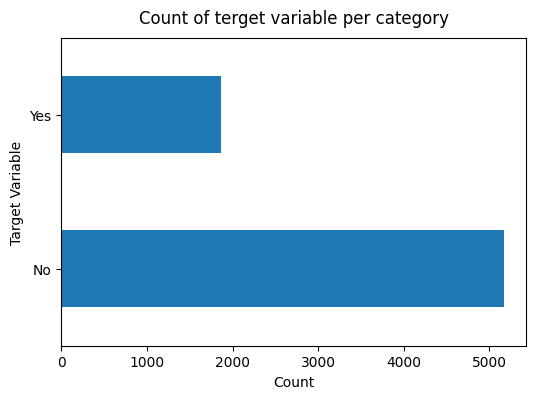

In [11]:
df['Churn'].value_counts().plot(kind='barh',figsize=(6,4)) # barh means horizontal bar graph
plt.xlabel('Count')
plt.ylabel('Target Variable')
_=plt.title('Count of terget variable per category',y=1.02)

In [12]:
df.Churn.value_counts()*100/len(df)

,count
Churn,
No,73.463013
Yes,26.536987


In [13]:
df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


- Data is highly imbalance ratio = 73.27
- So we analyse the data with other features while taking the target values eperately to get some insights

In [14]:
df.info()    #verbose=true when there is large number of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
# missing  = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
# plt.figure(figsize=(16,5))
# ax = sns.pointplot('index',0,data=missing)
# plt.xticks(rotation =90,fontsize=7)
# plt.title("Percentage of Missing Values")
# plt.ylabel("Percentage")
# plt.show()

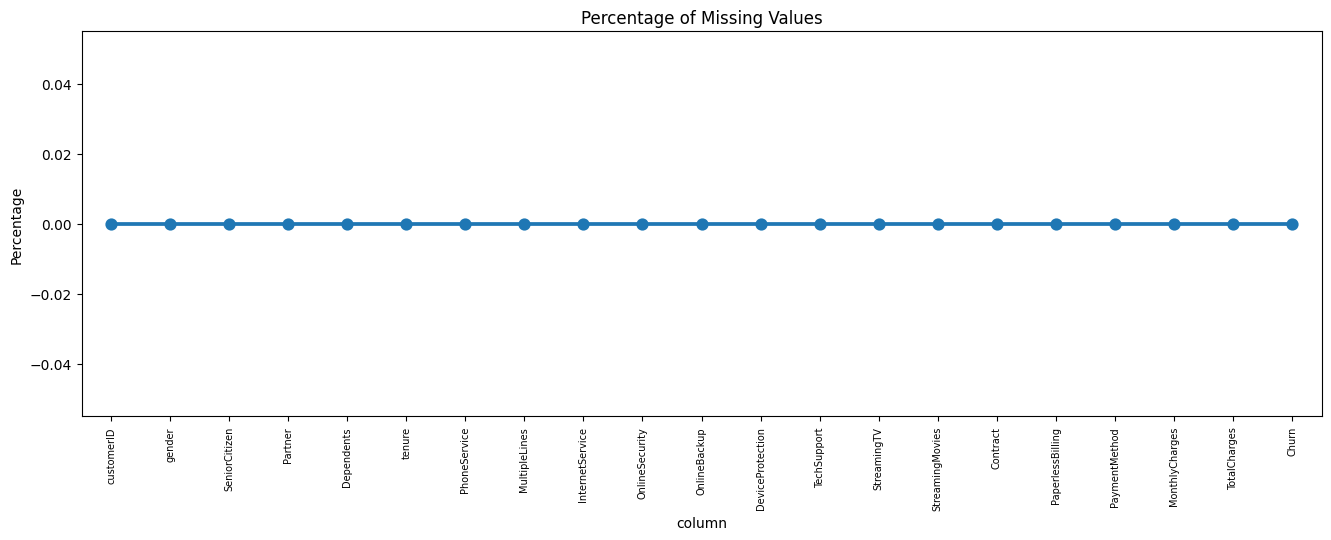

In [16]:
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['column', 'percentage_missing']  # Rename columns for clarity

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='column', y='percentage_missing', data=missing)  # Specify x and y properly
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()


**Missing Data -Initial Intuition**
- Here we dont have any null values or missing data

General Thumg rules:
- For features with less missing values we use regression to predict the missing values or fill with the mean of the values present, depending on the feature
- For features with very high number of missing values. It is better to drop those columns as they give very less insights or analysis
- As there is no thumg rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have morethan 30-40% missing values. But again there'is a catech here for example is_Car and car_type. People having no cars, will obviously have Car_type as null, but that doesn't make this column useless, so decision has to be taken wisely

TotalCharges should be int or float type but it is in object type i.e String so we have to change that

### Data Cleaning

**1.**Create a copy of base data for manipulation and processing

In [17]:
new_df = df.copy()

**2.**Total charges should be numeris amount. Let's convert that

In [18]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges,errors='coerce')
new_df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**3.**AS we cann see there are 11 missing values in TotalCharges i.e 0.15%. Let's check these records

In [19]:
new_df.loc[new_df.TotalCharges.isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


*****4.Missing Value Treatment*****

As the percentage of null values are very less so it is safe to ignore them

In [20]:
new_df.dropna(how='any',inplace=True)

**5.** Divide customers into ins based ontenure e.g. for tenuew <12 months assign a tenure group if 1-12, for tenuew between 1 to 2 Yrs, tenure group of 13-24 so on...

In [21]:
# Get the maximum tenure
new_df.tenure.max()

72

In [22]:
labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
print(labels)

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [23]:
new_df['tenure_group']  = pd.cut(new_df.tenure,range(1,80,12),right=False,labels=labels)

In [24]:
new_df.tenure_group.value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


**6.** Remove columns which are not required for processing

In [25]:
new_df.drop(columns=['customerID','tenure'],axis=1,inplace=True)
new_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Data Exploration

**1.** Plot the distribution of individual predictors by churn

*****Univariate Analysis*****

In [26]:
new_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [27]:
new_df.Churn.value_counts()*100/len(new_df)

,count
Churn,
No,73.421502
Yes,26.578498


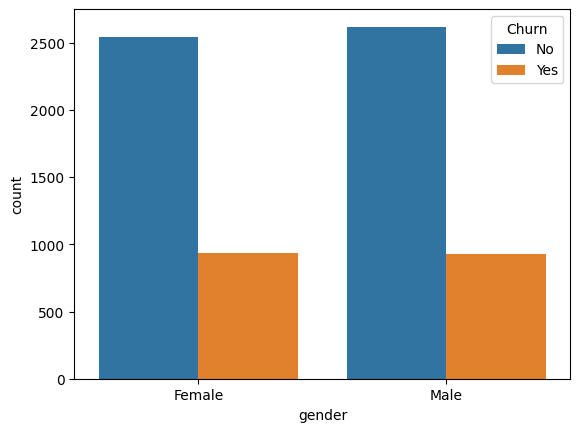

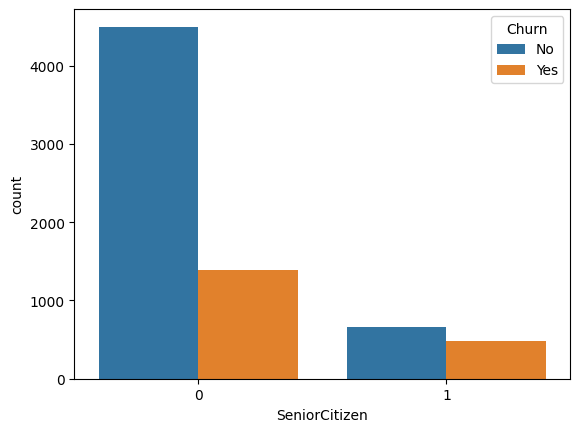

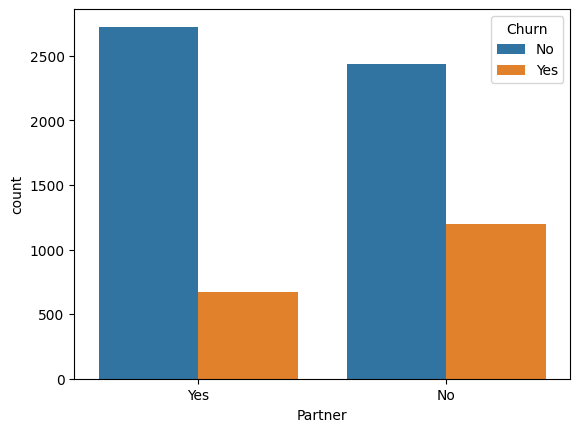

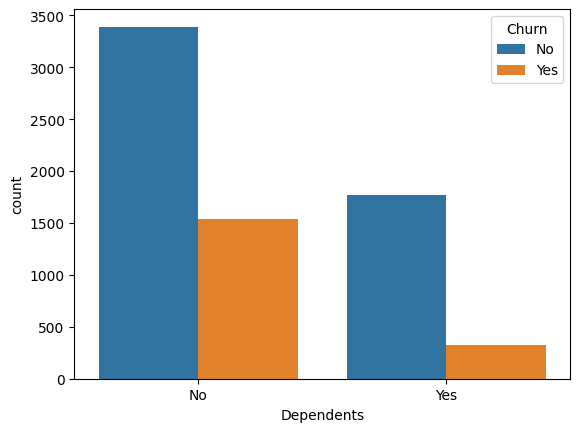

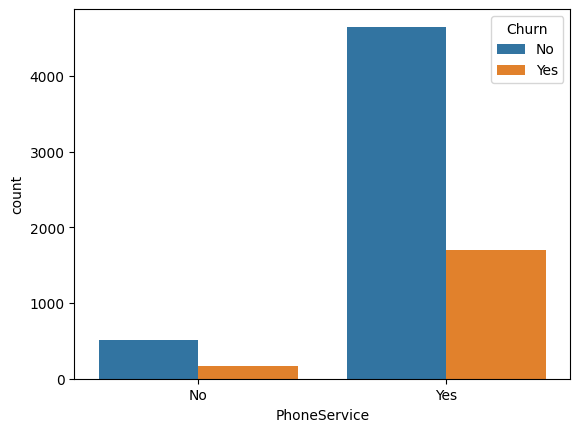

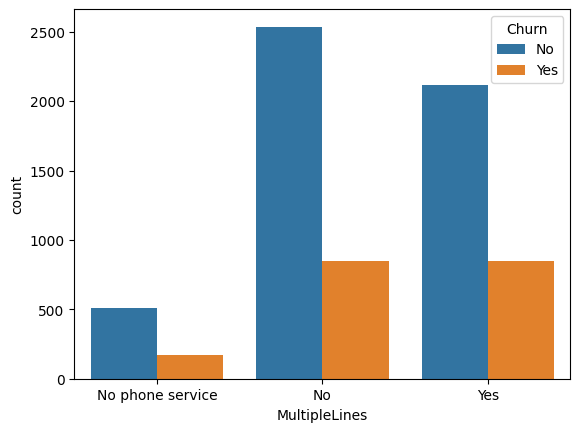

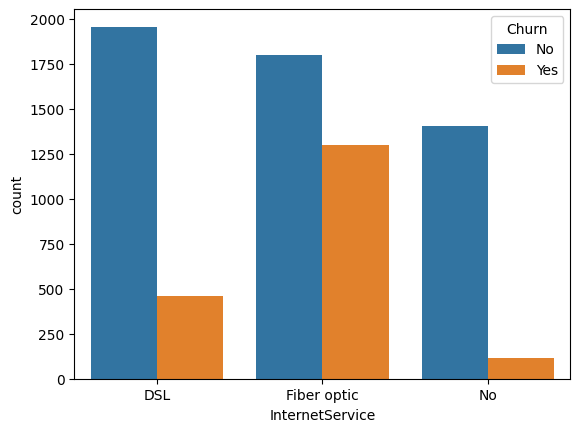

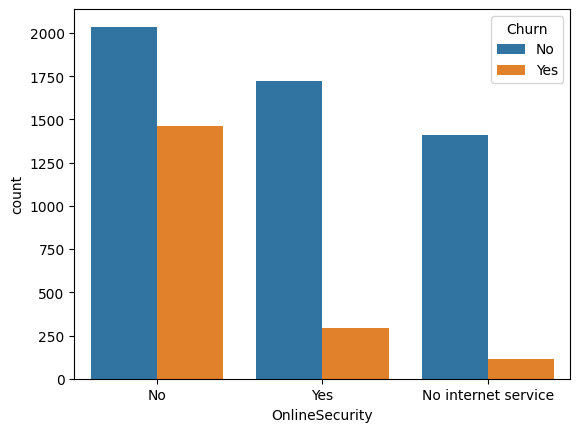

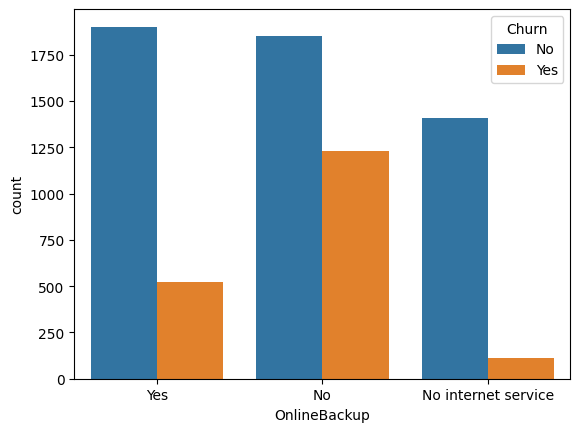

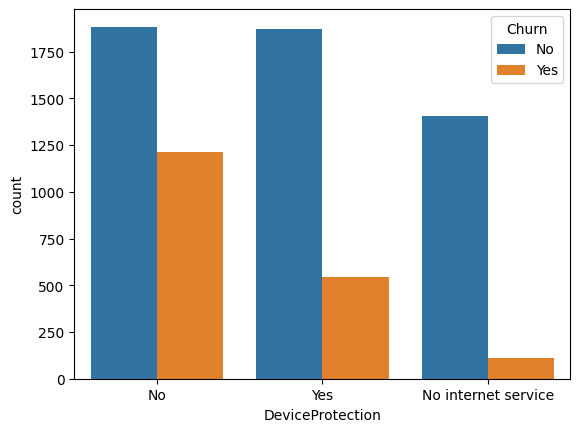

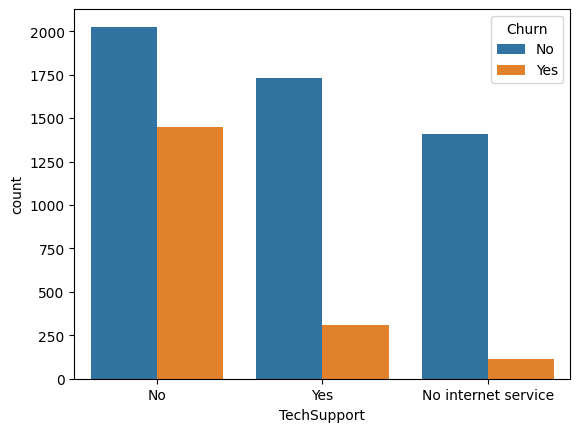

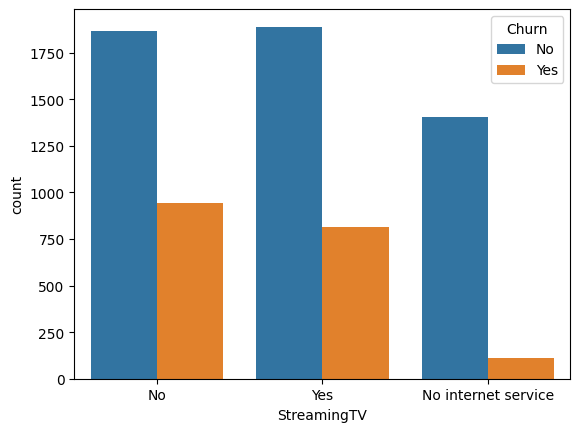

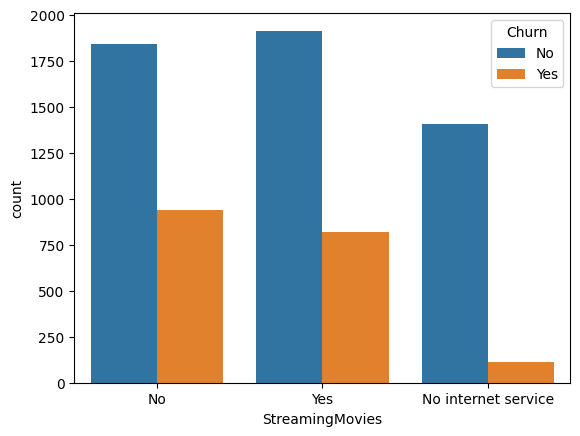

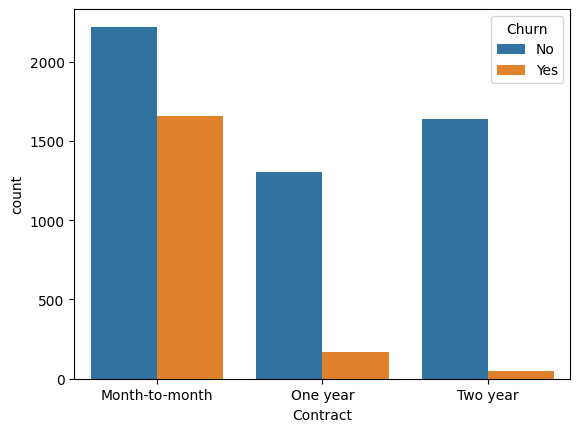

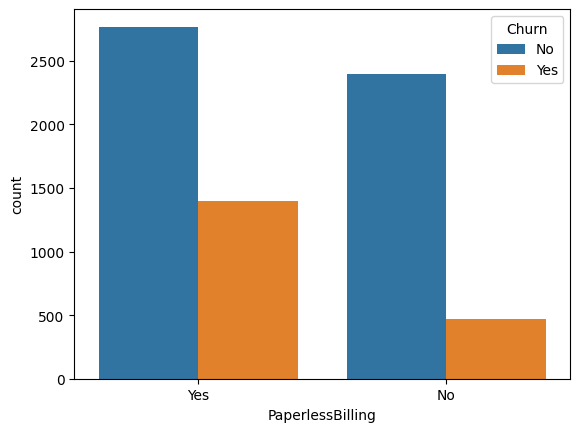

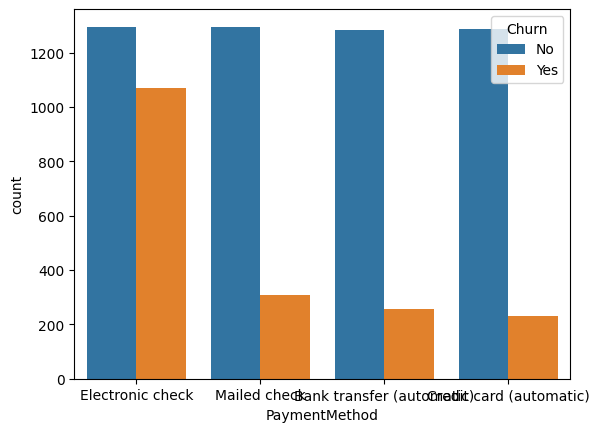

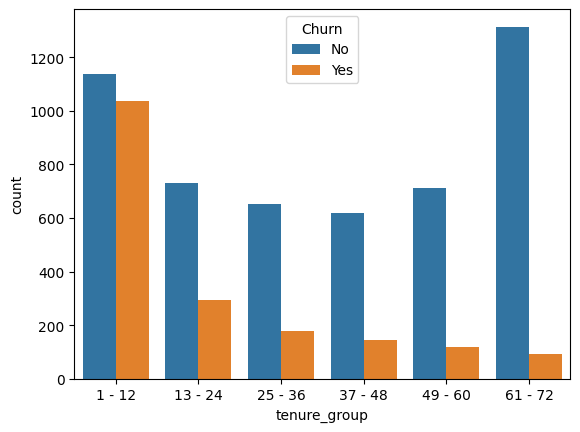

In [28]:
for i,predictor in enumerate(new_df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
  plt.figure()
  sns.countplot(data=new_df,x=predictor,hue='Churn')

1 .Senior Citizens are more likely to Churn \\
2 .People who have no partners are more likely to Churn...etc \\
3 . Month to Month customers are more likely to Churn i.e 41% remaining are 13% and 5%. So People with more length contract are not churning \\
4 . People who pay via Electronic Check are more likely to Churn

*****Numerical ANalysis*****

In [29]:
new_df.gender.value_counts()

,count
gender,
Male,3549
Female,3483


In [30]:
new_df1_target0 = new_df[new_df.Churn=='No']
new_df1_target1 = new_df[new_df.Churn=='Yes']

In [31]:
new_df.gender.value_counts()

,count
gender,
Male,3549
Female,3483


In [32]:
new_df1_target1.gender.value_counts()

,count
gender,
Female,939
Male,930


Both sre nearly 1:1 ratio so from this also we can say that gender alone not doing anything

In [33]:
pd.crosstab(new_df.PaymentMethod,new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


Nearly 50% people whose payment method is through the Electronic Check are more likely to Churn

**2. Convert the target variable into numerical data type as we are conducting Numerical analysis it is a good approach**

In [34]:
new_df['Churn'] = np.where(new_df.Churn == 'Yes',1,0)
new_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.**Convert the Categorical variables into dummy variables

In [35]:
new_df_dummies = pd.get_dummies(new_df,dtype=int)
new_df_dummies.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Analysing the relation between Monthly Charges and Total charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

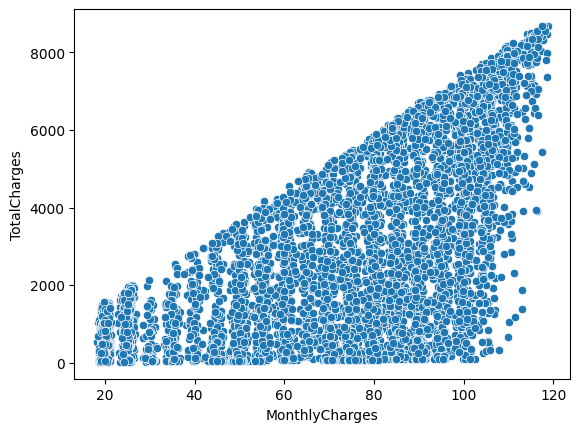

In [36]:
sns.scatterplot(data=new_df_dummies,x='MonthlyCharges',y='TotalCharges')

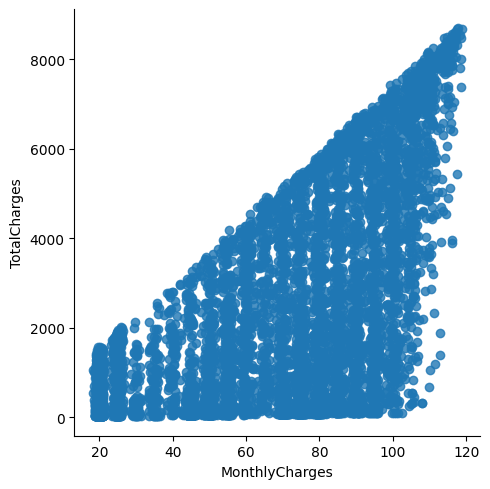

In [37]:
sns.lmplot(data=new_df_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

In [38]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

0.6510648032262027

Total charges increases as Monhtly Charges increases as we expected

Churn by Monthly Charges and Total Charges

<ipython-input-39-f64918163020>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies.Churn==0)],color='Red',shade=True)
<ipython-input-39-f64918163020>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies.Churn==1)],color='Blue',shade=True)


Text(0.5, 1.0, 'Monthly Charges by Churn')

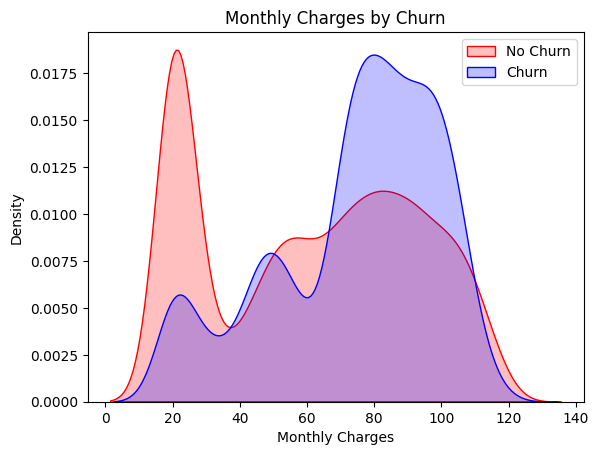

In [39]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies.Churn==0)],color='Red',shade=True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies.Churn==1)],color='Blue',shade=True)
Mth.legend(['No Churn','Churn'],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by Churn')

**Insight**: Churn is very high when the monthly Charges are high

<ipython-input-40-a085c3d42e1f>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  toc = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies.Churn==0)],color='Red',shade=True)
<ipython-input-40-a085c3d42e1f>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  toc = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies.Churn==1)],color='Blue',shade=True)


Text(0.5, 1.0, 'Total Charges by Churn')

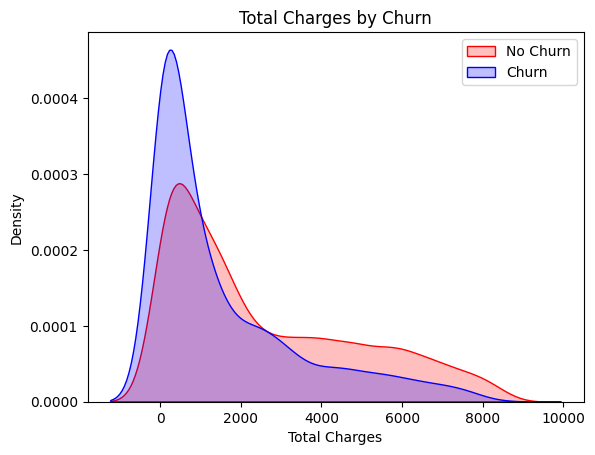

In [40]:
toc = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies.Churn==0)],color='Red',shade=True)
toc = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies.Churn==1)],color='Blue',shade=True)
toc.legend(['No Churn','Churn'],loc='upper right')
toc.set_ylabel('Density')
toc.set_xlabel('Total Charges')
toc.set_title('Total Charges by Churn')

** Surprising Insight** as higher Churn is at lower Monthly Charges

However if we combine the insights of 3 parameters i.e tenure,Monthly Charges and Total Charges then the picture is bit clear -> Higher monthly Charges at lower tenure results into lower Total Charge. Hence at these 3 factors viz Higher **Monthly Charges**, **Lower Tenure** and **Lower Total Charge** are coresponds to high Churn

Buils a correlation of all the predictors with Churn

<Axes: >

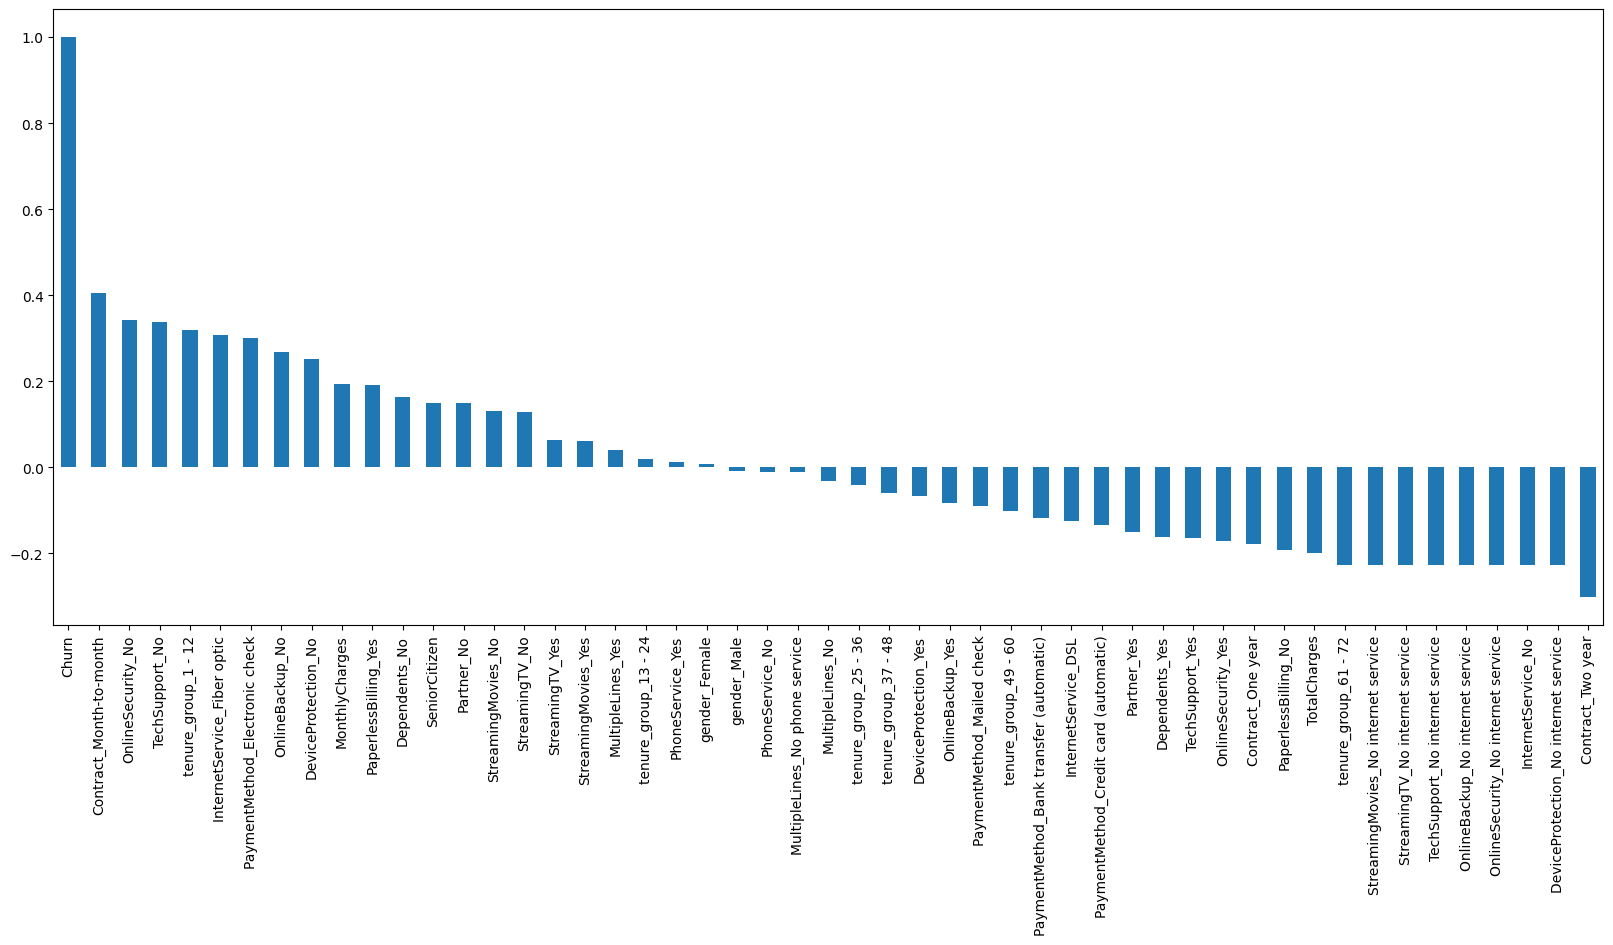

In [41]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

**Derives Insights** \\
**High** Churn seen in the case of **Month to Month contracts. No online security, No tech support, First year subscription** and **Fibre Optic Internet** \\
**LOW** chuen is seen in the cases of **Low term contracts, Subscription without Internet service** and **The customers engaged for 5+ years** \\
Factors like **Gender, Avaailability of Phone Services** and **No of multiple lines** have almost **NO** impact in Churn \\
This is also evident from the Heatmap below


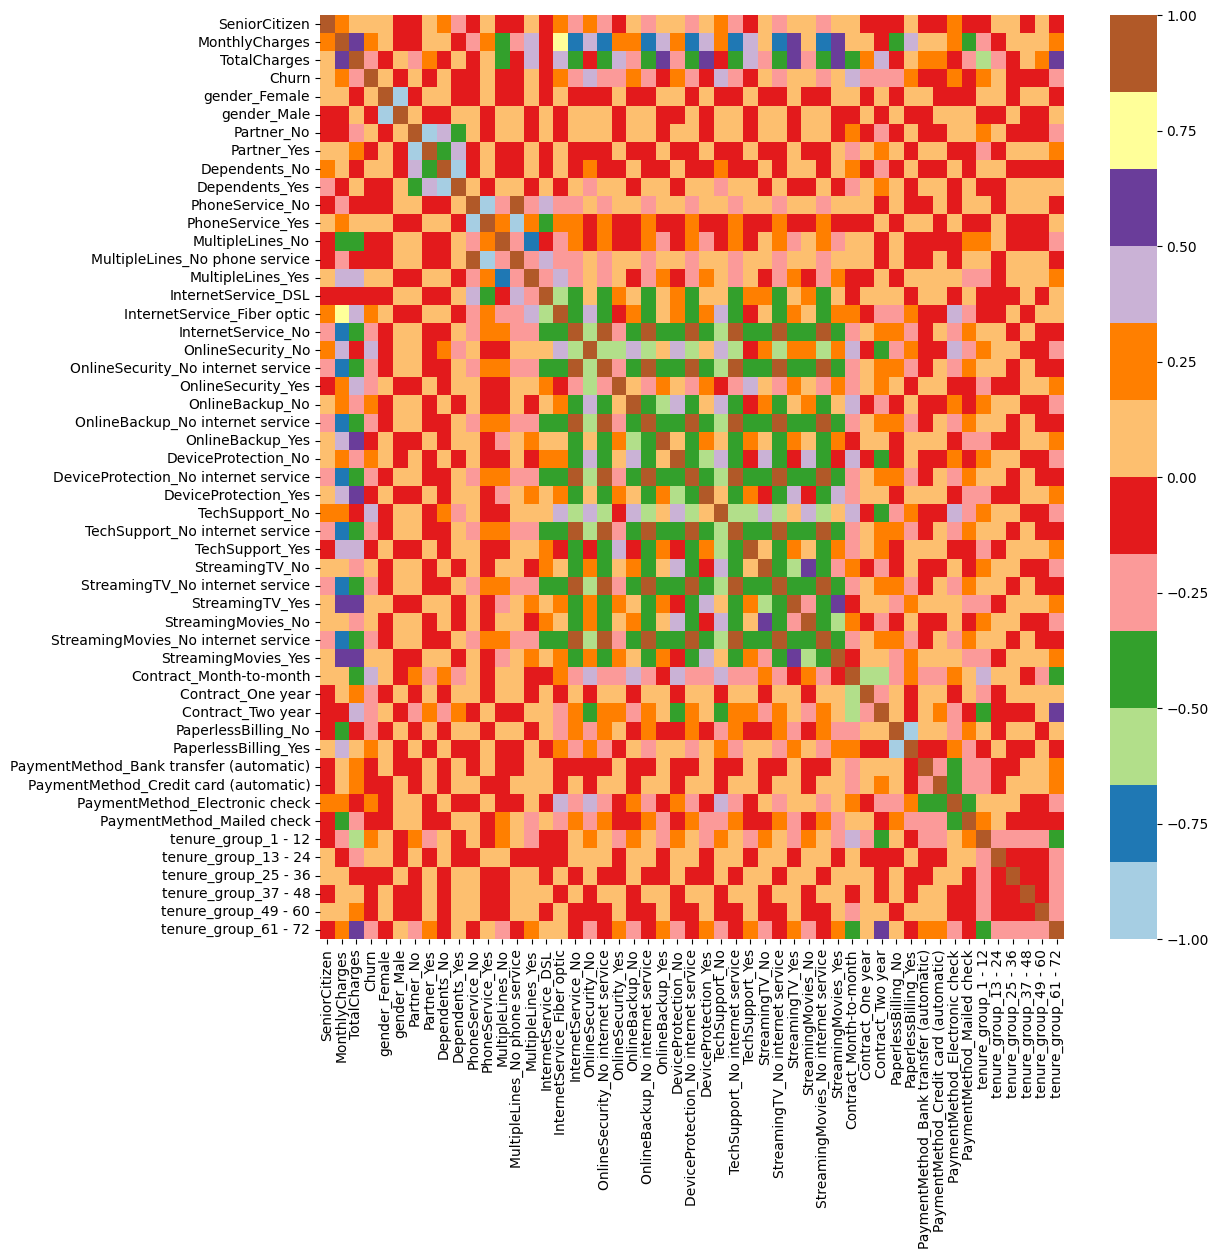

In [42]:
plt.figure(figsize=(12,12))
_=sns.heatmap(new_df_dummies.corr(),cmap='Paired')

As Tenure is also a numerical feature we can also plot the kdeplot for that but here we are converted that into tenure grops

<ipython-input-43-9dbd1d05188c>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(df.tenure[(df.Churn=='No')],color='Red',shade=True)
<ipython-input-43-9dbd1d05188c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(df.tenure[(df.Churn=='Yes')],color='Blue',shade=True)


Text(0.5, 1.0, 'Tenure by Churn')

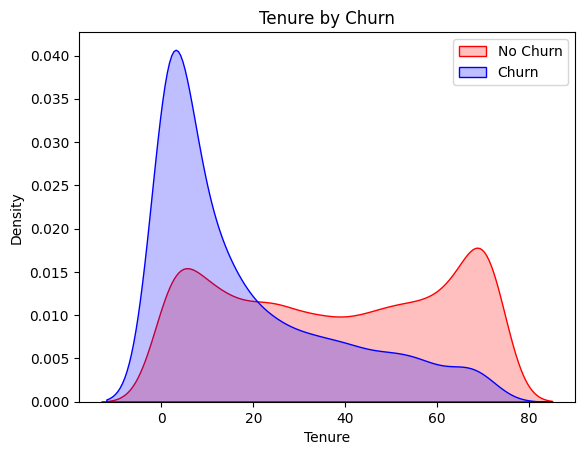

In [43]:
tot = sns.kdeplot(df.tenure[(df.Churn=='No')],color='Red',shade=True)
tot = sns.kdeplot(df.tenure[(df.Churn=='Yes')],color='Blue',shade=True)
tot.legend(['No Churn','Churn'],loc='upper right')
tot.set_ylabel('Density')
tot.set_xlabel('Tenure')
tot.set_title('Tenure by Churn')

Less tenure i.e New joiners are High Churners

*****Bivariate Analysis*****

In [68]:
new_df1_target0=new_df.loc[new_df["Churn"]==0]
new_df1_target1=new_df.loc[new_df["Churn"]==1]

In [69]:
len(new_df1_target1)

1869

In [70]:
len(new_df1_target0)

5163

In [107]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    # Pass the actual column data for hue if it's provided
    temp = pd.Series(data=df[hue]) if hue else pd.Series()
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)

    # Pass the actual column reference to hue
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=df[hue] if hue else None, palette='bright')

    plt.show()


In [84]:
new_df1_target1['Partner'].value_counts()

,count
Partner,
No,1200
Yes,669


In [86]:
new_df1_target0['Partner'].value_counts()

,count
Partner,
Yes,2724
No,2439


In [89]:
n1 = new_df1_target1[new_df1_target1['gender']=='Male']

In [90]:
n2 = new_df1_target1[new_df1_target1['gender']=='Female']

In [97]:
n3 = new_df1_target0[new_df1_target0['gender']=='Male']

In [96]:
n4 = new_df1_target0[new_df1_target0['gender']=='Female']

In [91]:
n1['Partner'].value_counts()

,count
Partner,
No,580
Yes,350


In [100]:
n2['Partner'].value_counts()

,count
Partner,
No,620
Yes,319


In [98]:
n3['Partner'].value_counts()

,count
Partner,
Yes,1360
No,1259


In [99]:
n4['Partner'].value_counts()

,count
Partner,
Yes,1364
No,1180


In [92]:
n2['Partner'].value_counts()

,count
Partner,
No,620
Yes,319


In [111]:
#uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

In [112]:
#uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

In [113]:
#uniplot(new_df1_target0,col='PaymentMethod',title='Distribution of Gender for Churned Customers',hue='gender')

<Axes: xlabel='Partner', ylabel='count'>

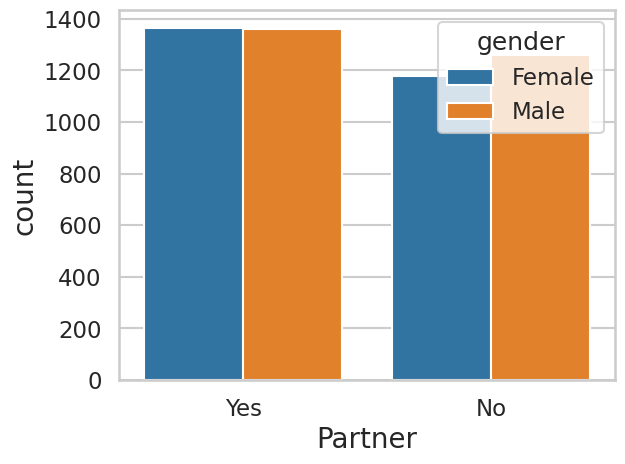

In [115]:
sns.countplot(data=new_df1_target0,x='Partner',hue='gender')

<Axes: xlabel='Partner', ylabel='count'>

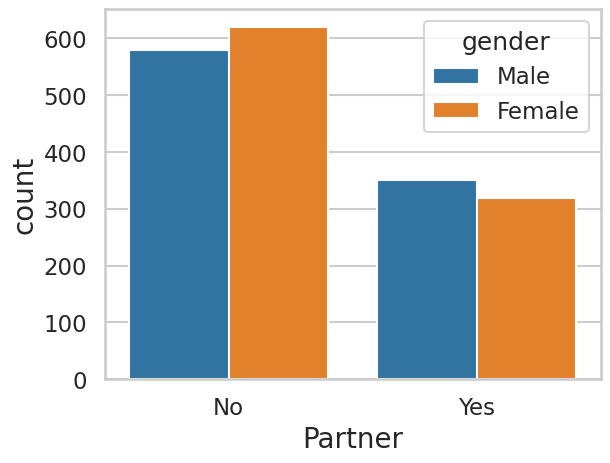

In [116]:
sns.countplot(data=new_df1_target1,x='Partner',hue='gender')

**Females who have no Partners are likely to Churn**

<Axes: xlabel='PaymentMethod', ylabel='count'>

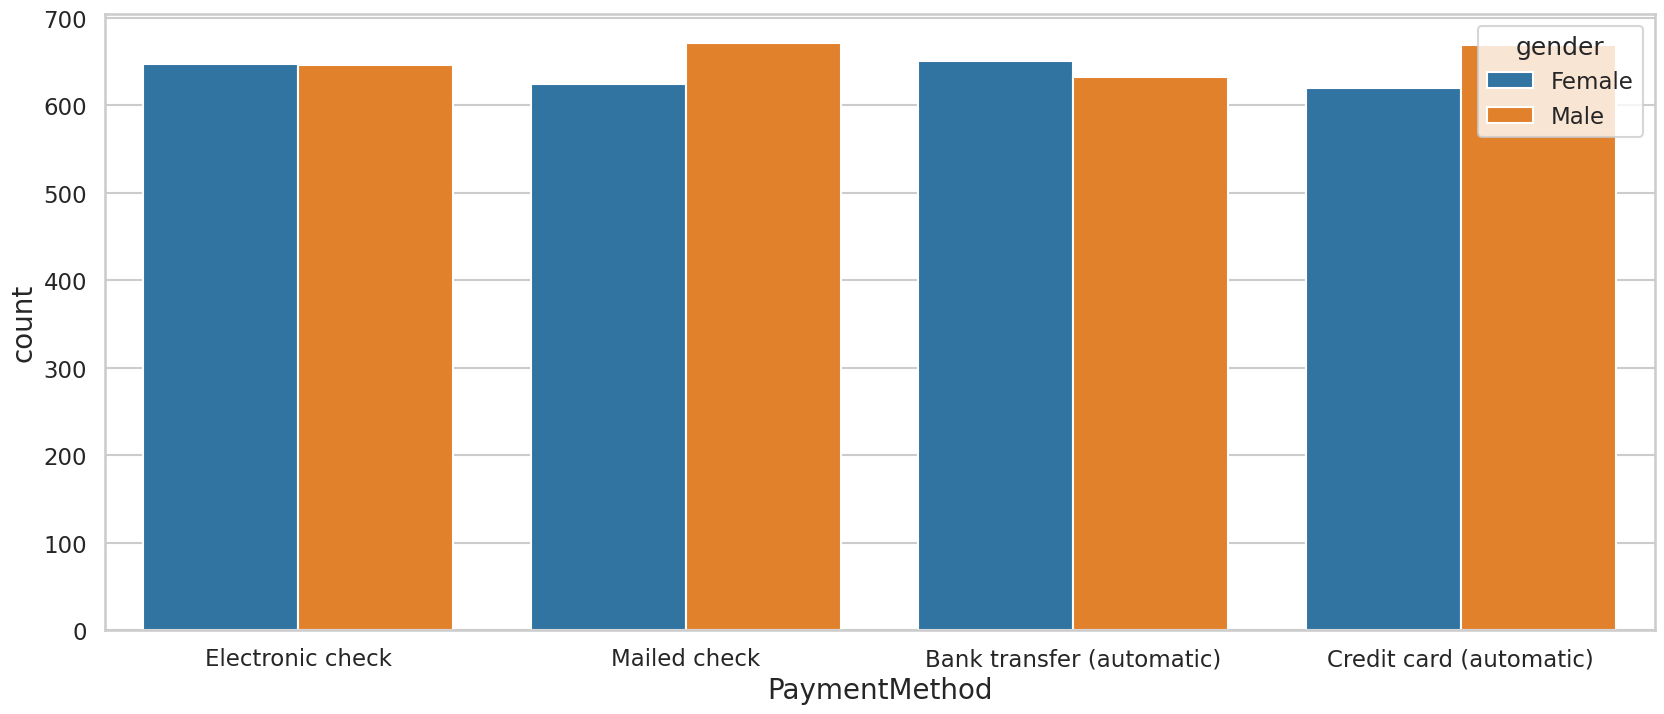

In [119]:
plt.figure(figsize=(20,8))
sns.countplot(data=new_df1_target0,x='PaymentMethod',hue='gender')

<Axes: xlabel='PaymentMethod', ylabel='count'>

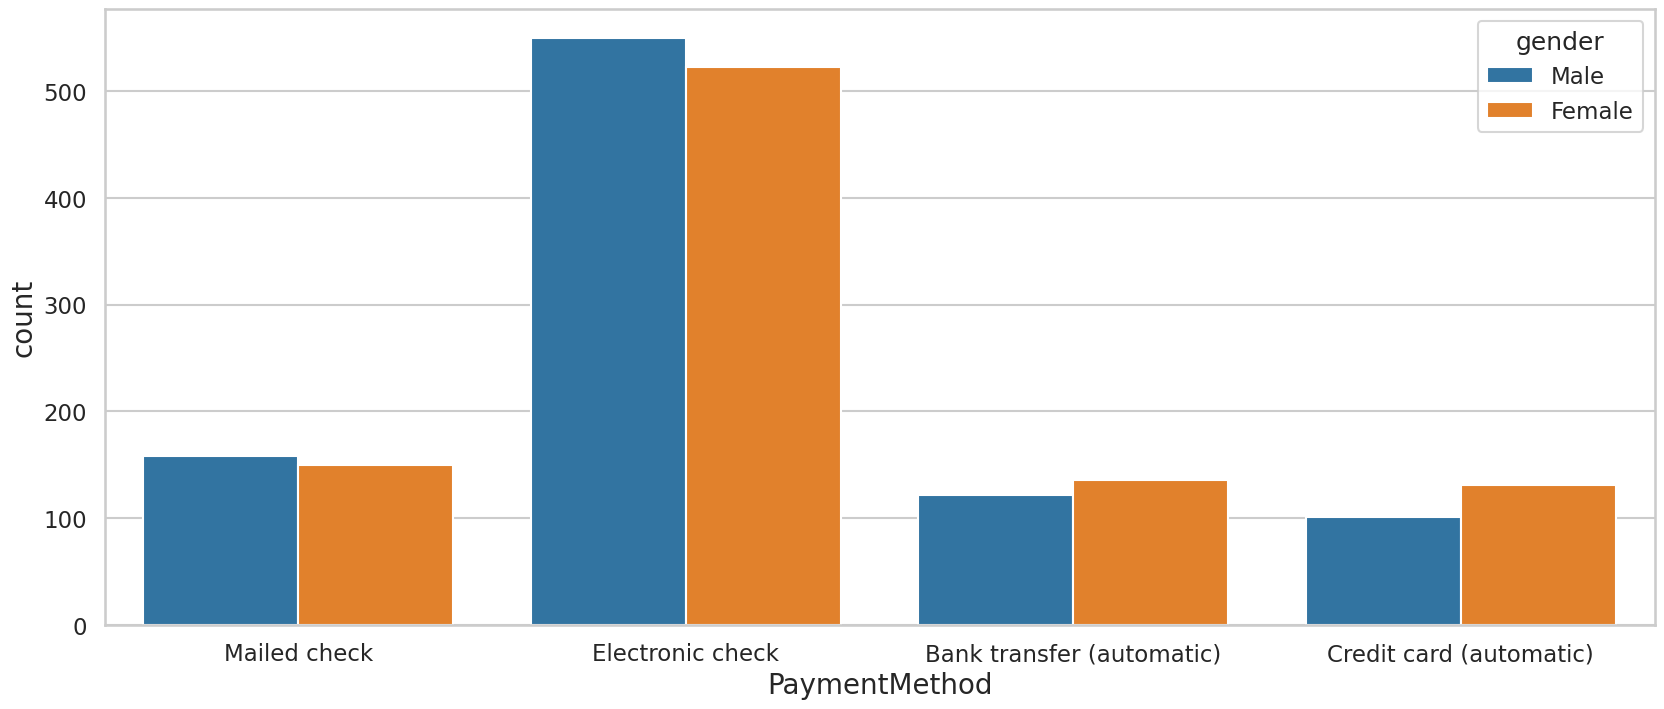

In [120]:
plt.figure(figsize=(20,8))
sns.countplot(data=new_df1_target1,x='PaymentMethod',hue='gender')

**Even the Credit card churners are less but females using Credit card are likely to Churn**

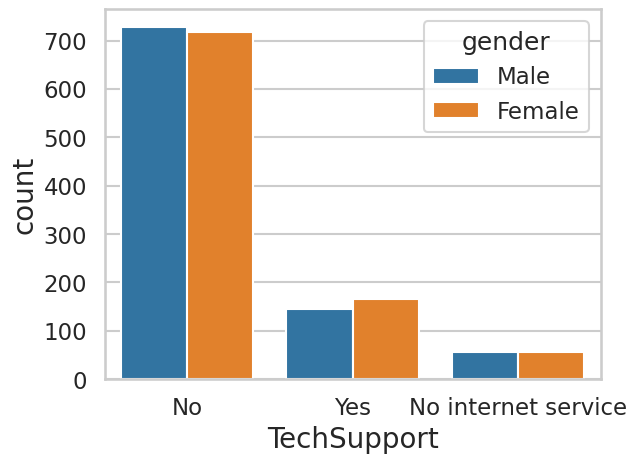

In [122]:
_= sns.countplot(data=new_df1_target1,x='TechSupport',hue='gender')

***Conclusion***
Thses are some of the quick insights from this exercise
  1. ELectronic Cheque medium are the highest Churners
  2. Contract Type- Monthly customers are more likely to Churn because of no contract terms as they are free to go customers
  3. No online Security, No Tech support category are high Churners
  4. Senior Citizens are high Churners